In [41]:
from experiments.scp_experiment import SCP_Experiment
from models.base_model import ClassificationModel
import numpy as np

class ConstantPredictionModel(ClassificationModel):
    """
    An example model that does not do any training and 
    returns the same constant prediction for all input
    """
    def __init__(self, name, n_classes,  sampling_frequency, outputfolder, input_shape):
        self.name = name
        self.n_classes = n_classes
        self.sampling_frequency = sampling_frequency
        self.outputfolder = outputfolder
        self.input_shape = input_shape 

    def fit(self, X_train, y_train, X_val, y_val):
        """
        Add real training to replace this function
        Right now this is a visualization of one example
        """
        import matplotlib.pyplot as plt
        trace = X_train[0, :, :]
        fig, axes = plt.subplots(3, 4, figsize=(14, 8.5))
        for i, ax in enumerate(axes.T.ravel()):
            ax.plot(trace[:, i], linewidth=1)
            ax.set_title(f"Channel {i}")
        fig.suptitle(f"Label: {y_train[0]}")

    def predict(self, X):
        batch_size, _, _ = X.shape
        ret = np.zeros([batch_size, self.n_classes], dtype=np.int)
        ret[:, 6] = 1
        return ret


> In this section, we briefly introduce the PTB-XL dataset [15]that  underlies  most  experiments  presented  below.  The  PTB-XL dataset comprises21837clinical 12-lead ECG records of10  seconds  length  from18885patients,  where52%  weremale  and48%  were  female.  The  ECG  statements  used  forannotation  are  conform  to  the  SCP-ECG  standard  [20]  and were assigned to three non-mutually exclusive categoriesdiag(short  for  diagnostic  statements  such  as  “anterior  myocardialinfarction”),form(related  to  notable  changes  of  particularsegments within the ECG such as “abnormal QRS complex”)andrhythm(related   to   particular   changes   of   the   rhythmsuch  as  “atrial  fibrillation”).  In  total,  there  are71differentstatements,  which  decompose  into44diagnostic,12rhythmand19form statements,4of which are also used as diagnosticECG statements. For diagnostic statements also a hierarchicalorganization into five coarse superclasses   and 24 sub-classesis  provided,  see  Figure  1  for  a  graphical  summary  in  termsof  diagnostic  superclasses.  For  further  details  on  the  dataset,the  annotation  scheme,  and  other  ECG  datasets  we  refer  thereader  to  the  original  publication  [15].

In [42]:
# Below is a config to be used with our modified SCP_Experiment class
# which accepts a "modelclass" so that we can easily test any custom 
# defined model in a notebook
constant_config = {'modelname': 'ConstantModel', 
                   'modelclass': ConstantPredictionModel,
                   'modeltype': None, 
                   'parameters': dict()}

datafolder = '../data/ptbxl/'
outputfolder = '../output/'
# experiments = [
#     ('exp0', 'all'),
#     ('exp1', 'diagnostic'),
#     ('exp1.1', 'subdiagnostic'),
#     ('exp1.1.1', 'superdiagnostic'),
#     ('exp2', 'form'),
#     ('exp3', 'rhythm')
#     ]
experiment = SCP_Experiment(experiment_name="my_exp1", task="all", 
                            datafolder=datafolder, outputfolder=outputfolder, 
                            models=[constant_config])


In [43]:
# This line takes a while to run
import time
tic = time.perf_counter()
experiment.prepare()
print(f"expriment.prepare() finished in {time.perf_counter() - tic} sec")

expriment.prepare() finished in 13.336722000000009 sec


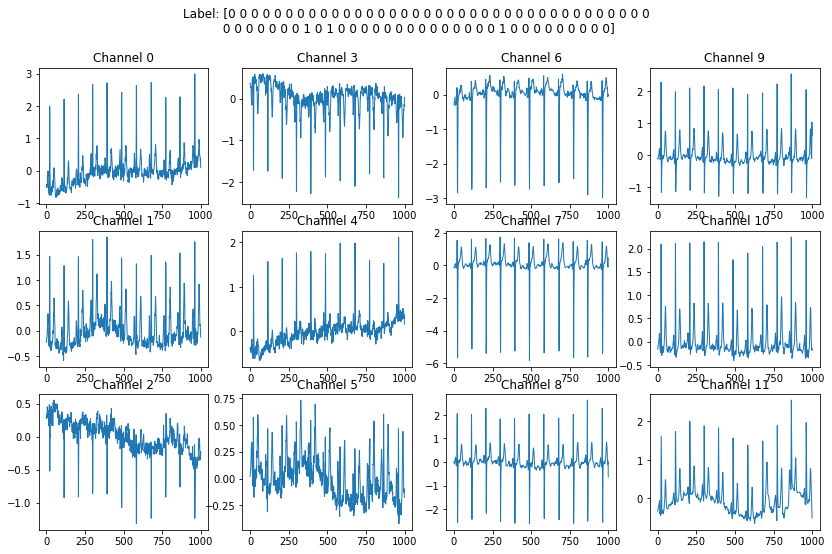

In [44]:
experiment.perform()

In [45]:
experiment.evaluate(bootstrap_eval=False)

ConstantModel
ensemble
naive


In [46]:
import pandas as pd
import os
for m in sorted(os.listdir(experiment.outputfolder+experiment.experiment_name+'/models')):
    print(m)
    rpath = experiment.outputfolder+experiment.experiment_name+'/models/'+m+'/results/'
    print(pd.read_csv(rpath+'te_results.csv', index_col=0))


ConstantModel
       macro_auc
point        0.5
mean         0.5
lower        0.5
upper        0.5
ensemble
       macro_auc
point        0.5
mean         0.5
lower        0.5
upper        0.5
naive
       macro_auc
point        0.5
mean         0.5
lower        0.5
upper        0.5


In [47]:
!ls

Finetuning-Example.ipynb
README.md
__init__.py
__pycache__
basics.ipynb
configs
experiments
models
reproduce_results.py
utils


Text(0.5, 0.98, 'Label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]')

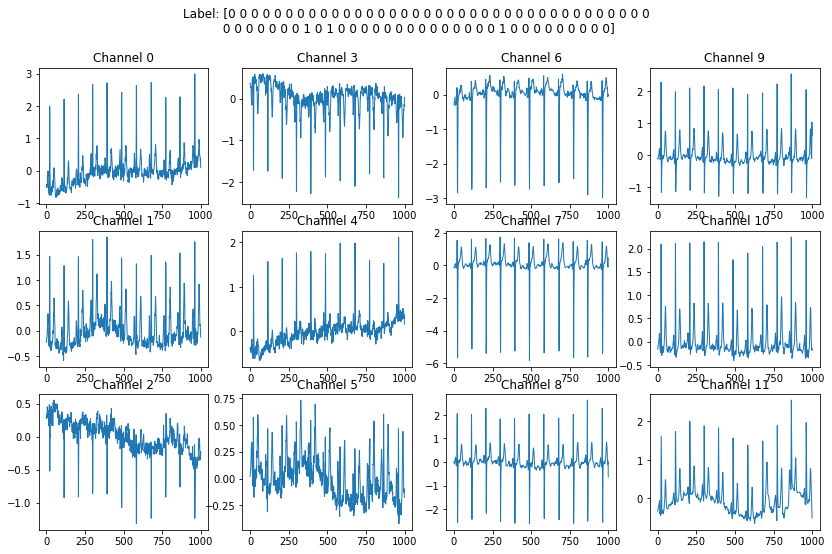

In [48]:
X_train = experiment.X_train
y_train = experiment.y_train
import matplotlib.pyplot as plt
trace = X_train[0, :, :]
fig, axes = plt.subplots(3, 4, figsize=(14, 8.5))
for i, ax in enumerate(axes.T.ravel()):
    ax.plot(trace[:, i], linewidth=1)
    ax.set_title(f"Channel {i}")
fig.suptitle(f"Label: {y_train[0]}")